In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# import data
species=pd.read_csv('species_info.csv')
obs=pd.read_csv('observations.csv')

# check import
# print('Species:')
# print(species.head())
# print('Observations:')
# print(obs.head())

# get a feel for the dfs
# print(species.info())
# print(obs.info())

# print df columns names
print(species.columns)
print(obs.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


What is the distribution of conservation_status for animals?

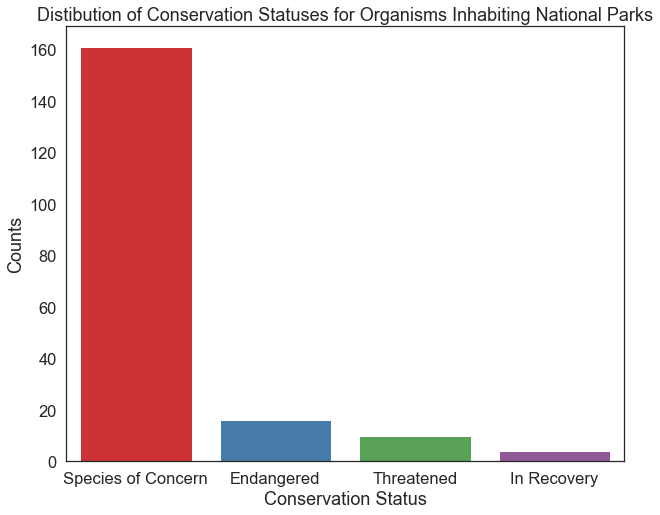

<Figure size 432x288 with 0 Axes>

In [33]:
# explore ditribution of conservation status of species
# create histogram/countplot of conservation statuses
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.set_palette('Set1')
sns.countplot(data=species, x='conservation_status')
sns.set_context('notebook', font_scale=1.5)
plt.xlabel('Conservation Status')
plt.ylabel('Counts')
plt.title('Distibution of Conservation Statuses for Organisms Inhabiting National Parks')

fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('distribution_conservation_statuses.png')
plt.clf()

Are certain types of species more likely to be endangered?


['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


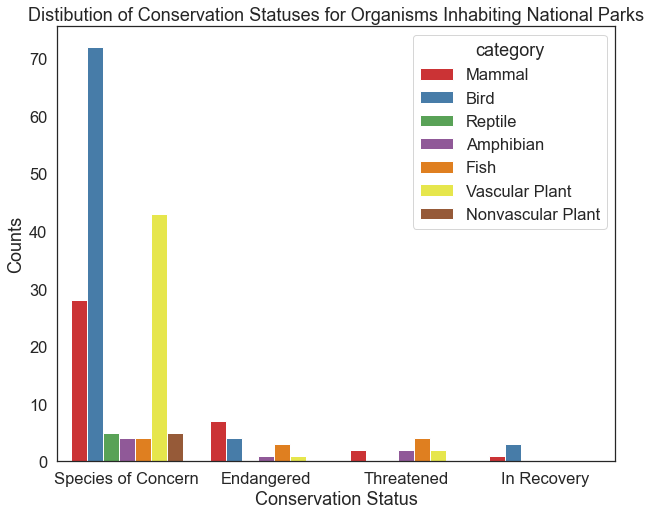

<Figure size 432x288 with 0 Axes>

In [34]:
# explore whether certain types of species are more likely to be endangered
# print unique 'type' values
print(species.category.unique())

# create histogram/count plot of conservation status by organism type
plt.figure(figsize=(10,8))
sns.set_style('white')
ax=sns.countplot(data=species, x='conservation_status', hue='category')
sns.set_context('notebook', font_scale=1.5)
sns.move_legend(ax, "upper right")
plt.xlabel('Conservation Status')
plt.ylabel('Counts')
plt.title('Distibution of Conservation Statuses for Organisms Inhabiting National Parks')

fig2=plt.gcf()
plt.show()
plt.draw()
fig2.savefig('distribution_conservation_statusesxCategory.png')
plt.clf()

# another way
# create histogram/count plot of conservation status by organism type
# plt.figure(figsize=(10,8))
# sns.set_style('white')
# ax2=sns.countplot(data=species, x='category', hue='conservation_status')
# sns.set_context('notebook', font_scale=1.25)
# sns.move_legend(ax2, "upper right")
# x_values=range(len(species.category.unique()))
# ax2.set_xticks(x_values)
# ax2.set_xticklabels(species.category.unique(), rotation=30)
# plt.xlabel('Conservation Status')
# plt.ylabel('Counts')
# plt.title('Distibution of Conservation Statuses for Organisms Inhabiting National Parks')

# plt.show()
# plt.clf()

Are the differences between species and their conservation status significant?

In [5]:
# create cross table to view counts
table = pd.crosstab(species.category, species.conservation_status)
print(table)

# run chi^2 to see if observed number of organisms in each category differs from expected
chi2, pval, dof, expected = chi2_contingency(table)
print('Chi^2:', chi2)
print('pval:', pval)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2
Chi^2: 53.91636314015659
pval: 1.8909788349761653e-05


Which species were spotted the most at each park?

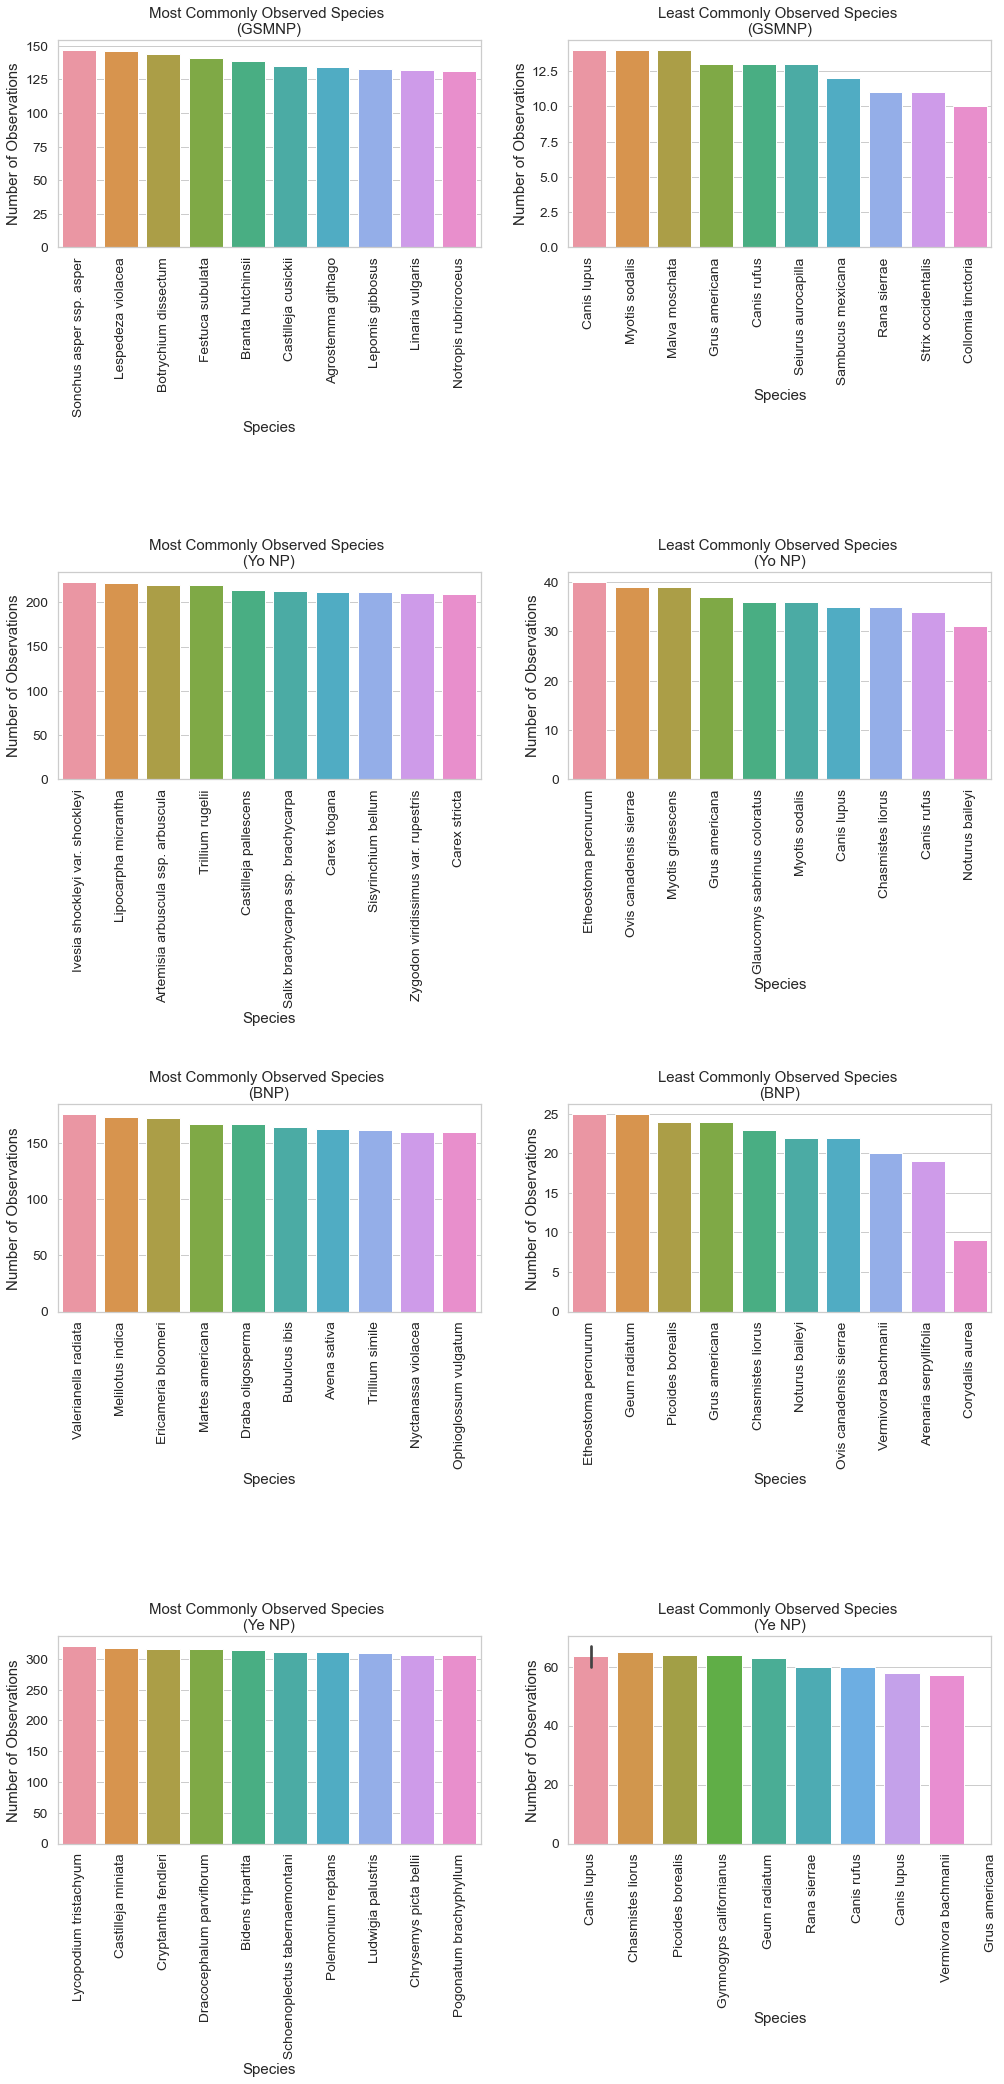

<Figure size 432x288 with 0 Axes>

In [30]:
# sort species descending based on frequency of observation in national parks
sorted_obs = obs.sort_values(by=['observations'], ascending=False)
#print(sorted_obs)

# how many national parks in df?
#print(obs.park_name.nunique())

# extract park names from park_name column
park=[]
for i in obs.park_name:
    if i not in park:
        park.append(i)
#print(park)

# write function to subset df by park
def park_subset(data, park):
    df=data[data.park_name==park]
    df_sort=df.sort_values(by=['observations'], ascending=False)
    return df_sort

# create subset dfs
smoky_df=park_subset(obs, 'Great Smoky Mountains National Park')
#print(smoky_df)
yosemite_df=park_subset(obs, 'Yosemite National Park')
bryce_df=park_subset(obs, 'Bryce National Park')
yellow_df=park_subset(obs, 'Yellowstone National Park')

# plot species based on observation number by park
plt.figure(figsize=(15,30))
sns.set_style('whitegrid')
sns.set_palette('Spectral')
plt.subplot(4,2,1)
ax1=sns.barplot(data=smoky_df[:10], x='scientific_name', y='observations')
x_values=range(len(smoky_df.scientific_name[:10]))
ax1.set_xticks(x_values)
ax1.set_xticklabels(smoky_df.scientific_name[:10], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Most Commonly Observed Species \n(GSMNP)')

plt.subplot(4,2,2)
ax2=sns.barplot(data=smoky_df[-10:], x='scientific_name', y='observations')
x_values=range(len(smoky_df.scientific_name[-10:]))
ax2.set_xticks(x_values)
ax2.set_xticklabels(smoky_df.scientific_name[-10:], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Least Commonly Observed Species \n(GSMNP)')

plt.subplot(4,2,3)
ax3=sns.barplot(data=yosemite_df[:10], x='scientific_name', y='observations')
x_values=range(len(yosemite_df.scientific_name[:10]))
ax3.set_xticks(x_values)
ax3.set_xticklabels(yosemite_df.scientific_name[:10], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Most Commonly Observed Species \n(Yo NP)')

plt.subplot(4,2,4)
ax4=sns.barplot(data=yosemite_df[-10:], x='scientific_name', y='observations')
x_values=range(len(yosemite_df.scientific_name[-10:]))
ax4.set_xticks(x_values)
ax4.set_xticklabels(yosemite_df.scientific_name[-10:], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Least Commonly Observed Species \n(Yo NP)')

plt.subplot(4,2,5)
ax5=sns.barplot(data=bryce_df[:10], x='scientific_name', y='observations')
x_values=range(len(bryce_df.scientific_name[:10]))
ax5.set_xticks(x_values)
ax5.set_xticklabels(bryce_df.scientific_name[:10], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Most Commonly Observed Species \n(BNP)')

plt.subplot(4,2,6)
ax6=sns.barplot(data=bryce_df[-10:], x='scientific_name', y='observations')
x_values=range(len(bryce_df.scientific_name[-10:]))
ax6.set_xticks(x_values)
ax6.set_xticklabels(bryce_df.scientific_name[-10:], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Least Commonly Observed Species \n(BNP)')

plt.subplot(4,2,7)
ax7=sns.barplot(data=yellow_df[:10], x='scientific_name', y='observations')
x_values=range(len(yellow_df.scientific_name[:10]))
ax7.set_xticks(x_values)
ax7.set_xticklabels(yellow_df.scientific_name[:10], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Most Commonly Observed Species \n(Ye NP)')

plt.subplot(4,2,8)
ax8=sns.barplot(data=yellow_df[-10:], x='scientific_name', y='observations')
x_values=range(len(yellow_df.scientific_name[-10:]))
ax8.set_xticks(x_values)
ax8.set_xticklabels(yellow_df.scientific_name[-10:], rotation=90)
plt.xlabel('Species')
plt.ylabel('Number of Observations')
plt.title('Least Commonly Observed Species \n(Ye NP)')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.tight_layout(pad=3.0)

fig3=plt.gcf()
plt.show()
plt.draw()
fig3.savefig('ParksxLeast_Most_Common_Species.png')